In [11]:
import gismcda
from gismcda import GisMcda

In [ ]:
# Remove constraint areas in the study area
# gismcda.remove_study_area_constraints("hk_wind_turbine_site_selection_case_study", 
#                                       "hk_wind_turbine_site_selection_case_study/data/hk_boundary.shp", 
#                                       "hk_wind_turbine_site_selection_case_study/constraint_layer")

In [ ]:
# Reclassification tool demonstration
# reclassification_dict = {1: (150, float('inf')),
#     2: (120, 150),
#     3: (80, 120),
#     4: (40, 80),
#     5: (float('-inf'), 40)}

# gismcda.reclassify_raster_layer("hk_wind_turbine_site_selection_case_study", 'wind_speed.tif', reclassification_dict)

# gismcda.plot_raster("hk_wind_turbine_site_selection_case_study/data/mean_average_annual_wind_speed.tif")
# gismcda.plot_raster("hk_wind_turbine_site_selection_case_study/criteria_layers/wind_speed.tif")

In [12]:
# Load criteria layers and study area
hk_wind = GisMcda("hk_wind_turbine_site_selection_case_study/criteria_layers",
                "hk_wind_turbine_site_selection_case_study/study_area/study_area_without_constraints.shp")

In [13]:
# Transforma, clip and align raster
hk_wind.check_raster()
hk_wind.transform_raster()

gismcda.check_raster("hk_wind_turbine_site_selection_case_study/clipped_criteria_layers")

Range of elevation.tif: 1.0 to 5.0
Range of river.tif: 0 to 5
Range of roughness.tif: 2.0 to 5.0
Range of settlements.tif: 0 to 5
Range of slope.tif: 0.0 to 4.0
Range of wind_speed.tif: 1.0 to 5.0
<open DatasetReader name='hk_wind_turbine_site_selection_case_study/clipped_criteria_layers\clipped_elevation.tif' mode='r'>
(1355, 1942)
Range: 0.0 to 5.0
<open DatasetReader name='hk_wind_turbine_site_selection_case_study/clipped_criteria_layers\clipped_river.tif' mode='r'>
(1355, 1942)
Range: 0 to 5
<open DatasetReader name='hk_wind_turbine_site_selection_case_study/clipped_criteria_layers\clipped_roughness.tif' mode='r'>
(1355, 1942)
Range: 0.0 to 5.0
<open DatasetReader name='hk_wind_turbine_site_selection_case_study/clipped_criteria_layers\clipped_settlements.tif' mode='r'>
(1355, 1942)
Range: 0 to 5
<open DatasetReader name='hk_wind_turbine_site_selection_case_study/clipped_criteria_layers\clipped_slope.tif' mode='r'>
(1355, 1942)
Range: 0.0 to 4.0
<open DatasetReader name='hk_wind_tur

In [14]:
# ahp weights
ahp_criteria_weights, ahp_criteria_direction = hk_wind.ahp()

result = hk_wind.weighted_sum()
ahp_weighted_sum, reclass_ahp_weighted_sum = result

result = hk_wind.topsis()
ahp_topsis, reclass_ahp_topsis = result

result = hk_wind.vikor()
ahp_vikor, reclass_ahp_vikor = result

result = hk_wind.edas()
ahp_edas, reclass_ahp_edas = result


The following is ahp -----------------------------------------------------------------------
Please provide the value representing the importance of each criterion:
Pairwise comparison matrix:
[[1.         1.5        0.75       1.5        0.5        0.33333333]
 [0.66666667 1.         0.5        1.         0.33333333 0.22222222]
 [1.33333333 2.         1.         2.         0.66666667 0.44444444]
 [0.66666667 1.         0.5        1.         0.33333333 0.22222222]
 [2.         3.         1.5        3.         1.         0.66666667]
 [3.         4.5        2.25       4.5        1.5        1.        ]]

Consistency Ratio (RC): 0.7640612076095951
The solution is inconsistent (RC > 0.10), the pairwise comparisons must be reviewed
{'clipped_elevation.tif': 0.11538461538461539, 'clipped_river.tif': 0.07692307692307697, 'clipped_roughness.tif': 0.15384615384615383, 'clipped_settlements.tif': 0.07692307692307691, 'clipped_slope.tif': 0.23076923076923073, 'clipped_wind_speed.tif': 0.3461538461

In [15]:
# fahp weights
fahp_criteria_direction, fahp_criteria_weights, fahp_range_weights = hk_wind.fahp()

result = hk_wind.ftopsis()
fahp_ftopsis, reclass_fahp_ftopsis = result

result = hk_wind.fedas()
fahp_fedas, reclass_fahp_fedas = result


The following is fahp -----------------------------------------------------------------------
Please provide three values representing the importance of each criterion:

Fuzzy Weights:
clipped_elevation.tif: [0.1   0.147 0.208]
clipped_river.tif: [0.114 0.168 0.261]
clipped_roughness.tif: [0.1   0.147 0.208]
clipped_settlements.tif: [0.114 0.168 0.261]
clipped_slope.tif: [0.112 0.168 0.254]
clipped_wind_speed.tif: [0.132 0.203 0.298]

Crisp Weights:
clipped_elevation.tif: 0.151
clipped_river.tif: 0.181
clipped_roughness.tif: 0.151
clipped_settlements.tif: 0.181
clipped_slope.tif: 0.178
clipped_wind_speed.tif: 0.211

Normalized Weights:
clipped_elevation.tif: 0.144
clipped_river.tif: 0.172
clipped_roughness.tif: 0.144
clipped_settlements.tif: 0.172
clipped_slope.tif: 0.169
clipped_wind_speed.tif: 0.2

Consistency Ratio (RC): 1.084252777233813
The solution is inconsistent (RC > 0.10), the pairwise comparisons must be reviewed

The following is Fuzzy TOPSIS ------------------------------

In [16]:
# dempster-shafer weight validation
# experts_opinion = [
#     {'clipped_elevation.tif': 0.11, 'clipped_river.tif': 0.085, 'clipped_roughness.tif': 0.15, 'clipped_settlements.tif': 0.075, 'clipped_slope.tif': 0.23, 'clipped_wind_speed.tif': 0.35},
#     {'clipped_elevation.tif': 0.09, 'clipped_river.tif': 0.04, 'clipped_roughness.tif': 0.14, 'clipped_settlements.tif': 0.09, 'clipped_slope.tif': 0.26, 'clipped_wind_speed.tif': 0.28},
#     {'clipped_elevation.tif': 0.08, 'clipped_river.tif': 0.03, 'clipped_roughness.tif': 0.13, 'clipped_settlements.tif': 0.08, 'clipped_slope.tif': 0.27, 'clipped_wind_speed.tif': 0.41},
#    ]

ahp_criteria_weights, fahp_criteria_weights
hk_wind.dst(experts_opinion)


Possibility for being the 1st importance:
{'clipped_slope.tif': 0.2690419758530171, 'clipped_roughness.tif': 0.04916449942034913, 'clipped_wind_speed.tif': 0.6526093575883813, 'clipped_elevation.tif': 0.015573003054683596, 'clipped_settlements.tif': 0.010983912789677131, 'clipped_river.tif': 0.002627251293891835}


{'clipped_slope.tif': 0.2690419758530171,
 'clipped_roughness.tif': 0.04916449942034913,
 'clipped_wind_speed.tif': 0.6526093575883813,
 'clipped_elevation.tif': 0.015573003054683596,
 'clipped_settlements.tif': 0.010983912789677131,
 'clipped_river.tif': 0.002627251293891835}

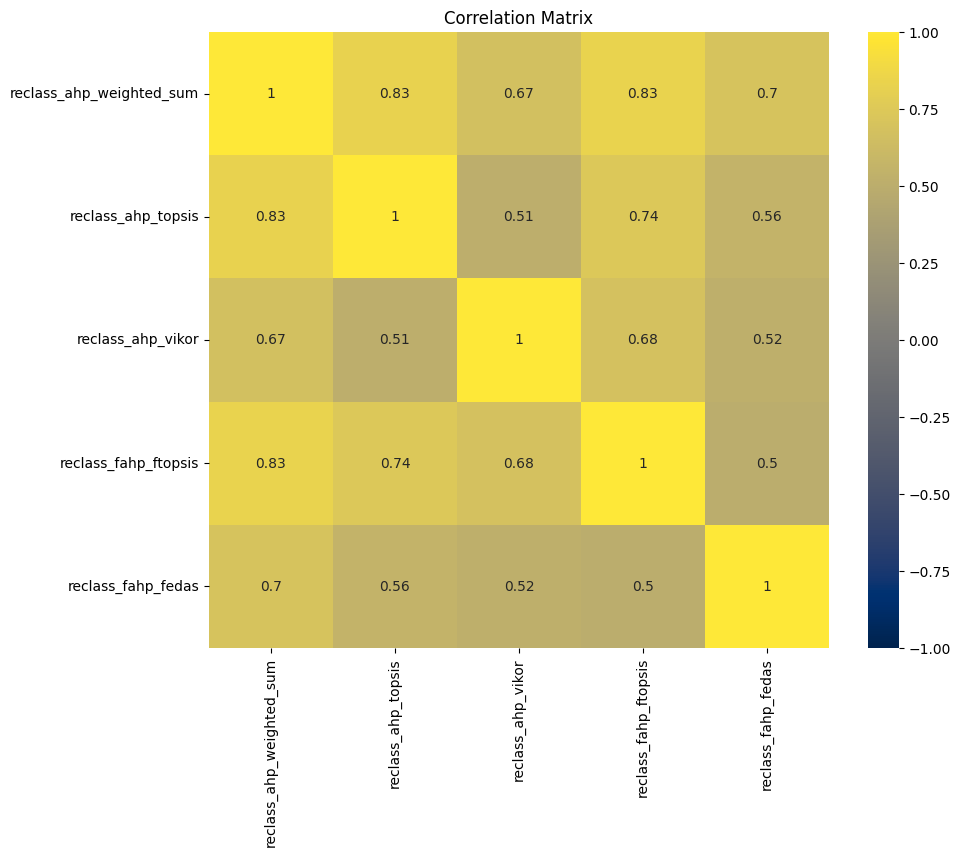

,reclass_ahp_weighted_sum,reclass_ahp_topsis,reclass_ahp_vikor,reclass_fahp_ftopsis,reclass_fahp_fedas
reclass_ahp_weighted_sum,1.000000,0.825338,0.666909,0.831406,0.697865
reclass_ahp_topsis,0.825338,1.000000,0.510004,0.740116,0.557766
reclass_ahp_vikor,0.666909,0.510004,1.000000,0.680498,0.521056
reclass_fahp_ftopsis,0.831406,0.740116,0.680498,1.000000,0.497256
reclass_fahp_fedas,0.697865,0.557766,0.521056,0.497256,1.000000


In [17]:
gismcda.correlation_matrix({"reclass_ahp_weighted_sum": reclass_ahp_weighted_sum, 
                            "reclass_ahp_topsis": reclass_ahp_topsis,
                            "reclass_ahp_vikor": reclass_ahp_vikor,
                            "reclass_fahp_ftopsis": reclass_fahp_ftopsis,
                            "reclass_fahp_fedas": reclass_fahp_fedas
                            })

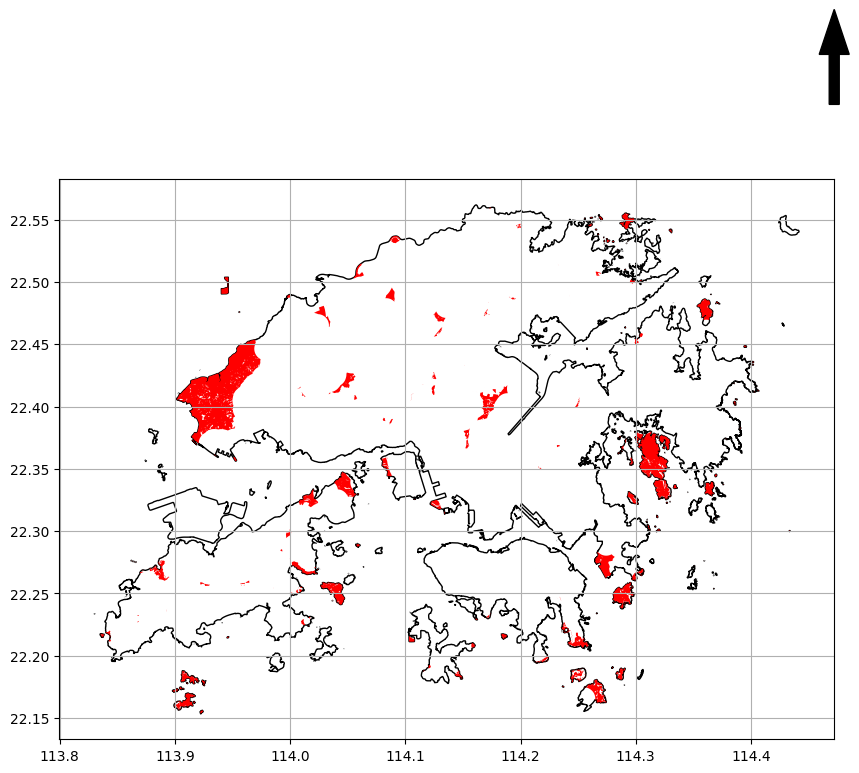

In [18]:
gismcda.plot_shapefile("hk_wind_turbine_site_selection_case_study/study_area/study_area_without_constraints.shp", 
                       base_map_path="hk_wind_turbine_site_selection_case_study/data/hk_boundary.shp")

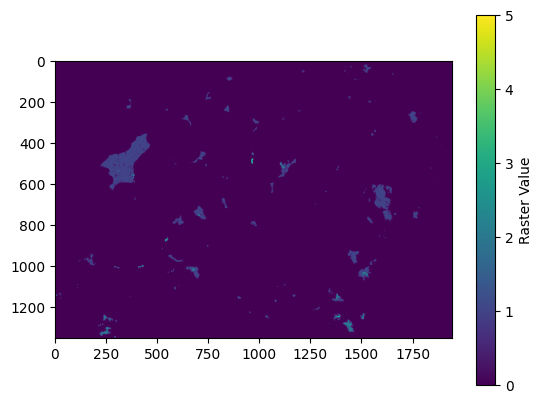

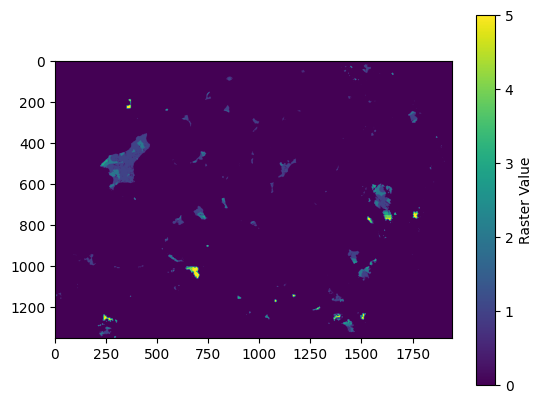

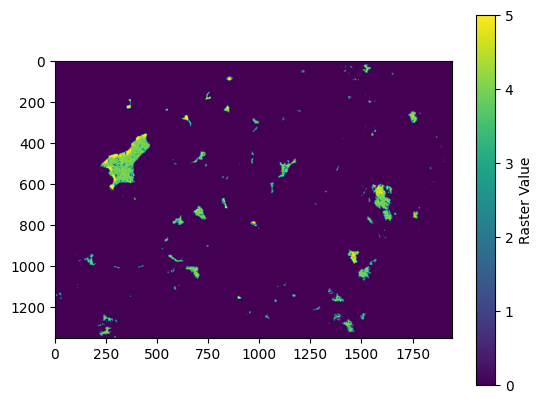

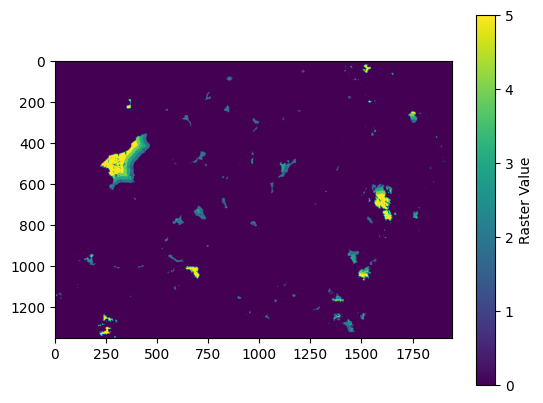

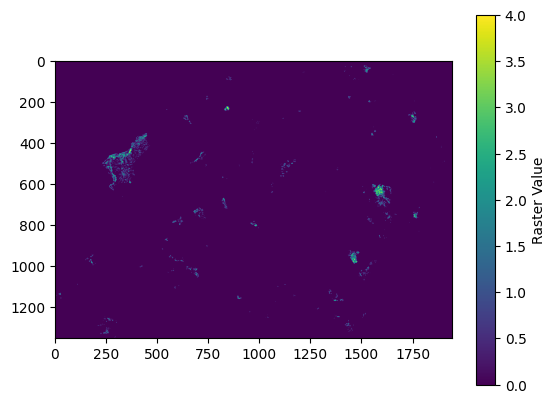

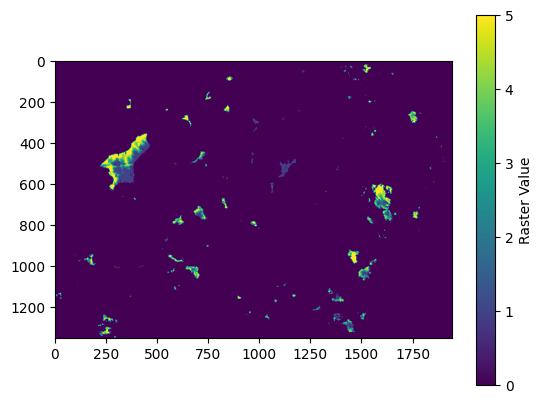

In [19]:
gismcda.plot_raster("hk_wind_turbine_site_selection_case_study/clipped_criteria_layers/clipped_wind_speed.tif")
gismcda.plot_raster("hk_wind_turbine_site_selection_case_study/clipped_criteria_layers/clipped_river.tif")
gismcda.plot_raster("hk_wind_turbine_site_selection_case_study/clipped_criteria_layers/clipped_roughness.tif")
gismcda.plot_raster("hk_wind_turbine_site_selection_case_study/clipped_criteria_layers/clipped_settlements.tif")
gismcda.plot_raster("hk_wind_turbine_site_selection_case_study/clipped_criteria_layers/clipped_slope.tif")
gismcda.plot_raster("hk_wind_turbine_site_selection_case_study/clipped_criteria_layers/clipped_elevation.tif")

C:\Users\james\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1368: RuntimeWarning: overflow encountered in double_scalars
  return vmin + val * (vmax - vmin)
C:\Users\james\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: overflow encountered in double_scalars
  resdat /= (vmax - vmin)
C:\Users\james\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


ValueError: Axis limits cannot be NaN or Inf

C:\Users\james\AppData\Roaming\Python\Python311\site-packages\matplotlib\image.py:452: RuntimeWarning: overflow encountered in double_scalars
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\james\AppData\Roaming\Python\Python311\site-packages\matplotlib\image.py:455: RuntimeWarning: invalid value encountered in double_scalars
  newmin = vmid - dv * fact
C:\Users\james\AppData\Roaming\Python\Python311\site-packages\matplotlib\image.py:484: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


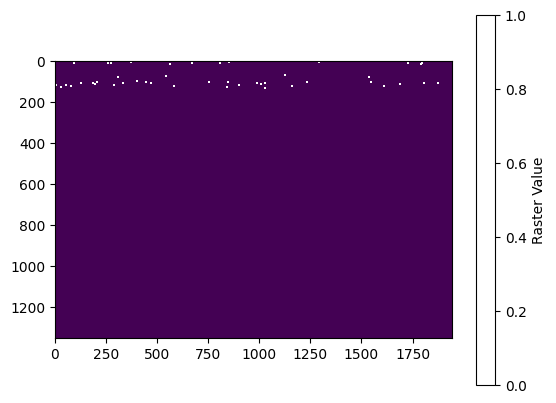

In [20]:
gismcda.plot_raster("weighted_sum_scores.tif")
gismcda.plot_raster("reclass_weighted_sum_scores.tif")
gismcda.plot_raster("topsis_scores.tif")
gismcda.plot_raster("reclass_topsis_scores.tif")

C:\Users\james\AppData\Roaming\Python\Python311\site-packages\matplotlib\image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
C:\Users\james\AppData\Roaming\Python\Python311\site-packages\matplotlib\image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact
C:\Users\james\AppData\Roaming\Python\Python311\site-packages\matplotlib\image.py:484: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


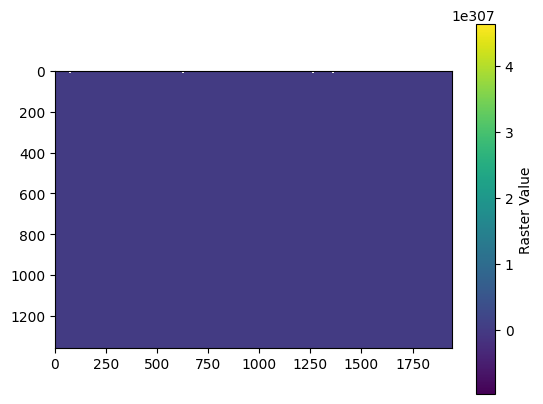

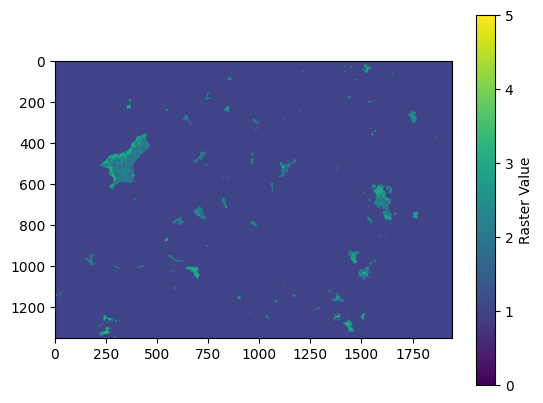

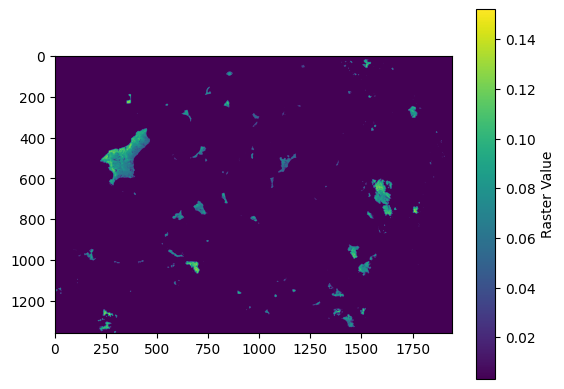

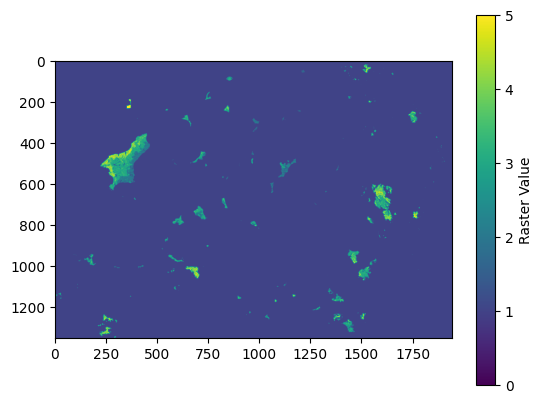

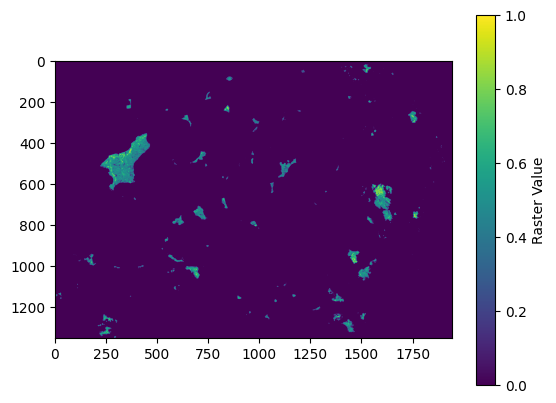

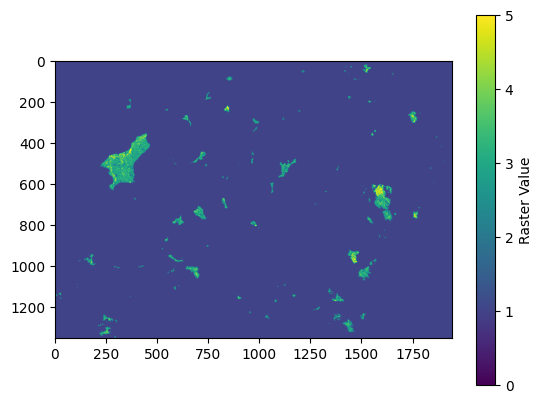

In [ ]:
gismcda.plot_raster("vikor_scores.tif")
gismcda.plot_raster("reclass_vikor_scores.tif")
gismcda.plot_raster("fuzzy_topsis_scores.tif")
gismcda.plot_raster("reclass_fuzzy_topsis_scores.tif")
gismcda.plot_raster("fuzzy_edas_scores.tif")
gismcda.plot_raster("reclass_fuzzy_edas_scores.tif")